In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

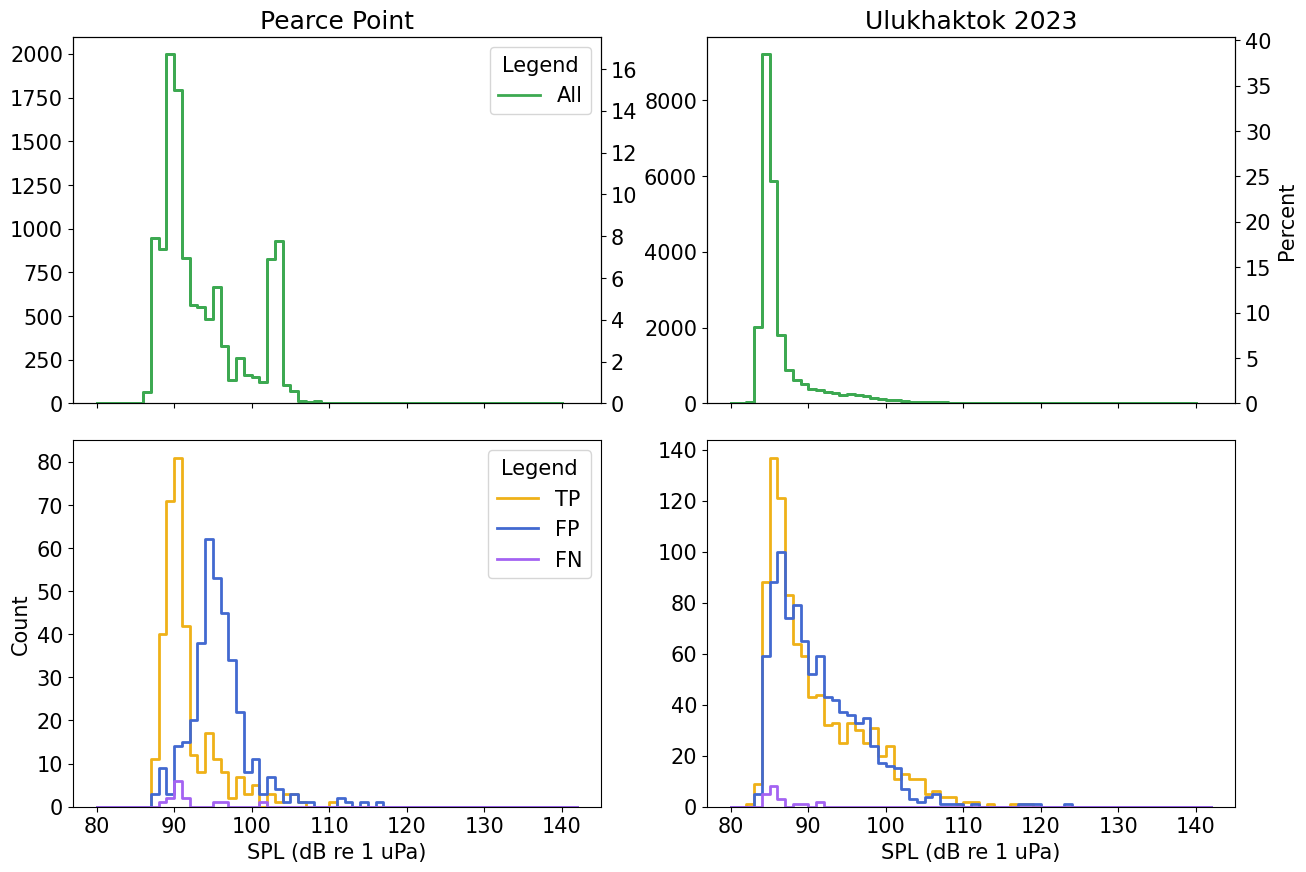

In [11]:
f, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 10))

det_file_ulu = pd.read_excel(r'E:\baseline-with-normalization-reduce-tonal\ulu2023\detections\ensemble\detections-pos-SPL-ulu23.xlsx')
det_file_pp = pd.read_excel(r'E:\baseline-with-normalization-reduce-tonal\pearce-point\detections\ensemble\detections-pos-SPL-pp.xlsx')

det_files = [det_file_pp, det_file_ulu]

for idx, file in enumerate(det_files):

    sub = file[['filename', 'start', 'end', 'Median', 'Dets', 'SPL', 'Manual Class']].copy()

    filled = pd.DataFrame(columns=['bin', 'num-TP', 'num-FP', 'num-FN'])

    TP = sub[sub['Dets'] == 1]
    TP = TP[TP['Manual Class']==1]

    FP = sub[sub['Dets'] == 1]
    FP = FP[FP['Manual Class']==0]

    FN = sub[sub['Dets'] == 0]
    FN = FN[FN['Manual Class']==1]

    # Wanted palette details
    enmax_palette = ["#EFB118", "#4269D0", "#3CA951", "#9498A0", "#A463F2"]
    color_codes_wanted = ['orange', 'blue', 'green', 'grey', 'purple']

    c = lambda x: enmax_palette[color_codes_wanted.index(x)]

    #plt.hist(TP['SPL'], bins=range(80,136))
    sns.histplot(ax=axes[1, idx], data=TP['SPL'], bins=range(80,143), element="step", color = c("orange"), fill=False, linewidth=2)   
    sns.histplot(ax=axes[1, idx], data=FP['SPL'], bins=range(80,143), element="step", color= c("blue"), fill=False, linewidth=2)
    sns.histplot(ax=axes[1, idx], data=FN['SPL'], bins=range(80,143), element="step", color= c("purple"), fill=False, linewidth=2)
    sns.histplot(ax=axes[0, idx], data=sub['SPL'], bins=range(80, 141), element="step", color=c("green"), fill=False, linewidth=2)

    if axes[0, idx] == axes[0,0]:
        ax2 = axes[0,idx].twinx()
        sns.histplot(ax=ax2, data=sub['SPL'], bins=range(80, 141), element="step", color=c("green"), fill=False, linewidth=2, stat='percent')
        ax2.set_ylabel('')

    if axes[0, idx] == axes[0,1]:
        ax2 = axes[0,idx].twinx()
        sns.histplot(ax=ax2, data=sub['SPL'], bins=range(80, 141), element="step", color=c("green"), fill=False, linewidth=2, stat='percent')

axes[1, 1].set_xlabel('SPL (dB re 1 uPa)')
axes[1, 0].set_xlabel('SPL (dB re 1 uPa)')
axes[0, 1].set_ylabel('')
axes[0, 0].set_ylabel('Density')
axes[1, 1].set_ylabel('')
axes[1, 1].set_ylabel('')
axes[0, 0].legend(['All'], title='Legend', loc='upper right')
axes[1, 0].legend(['TP', 'FP', 'FN'], title='Legend', loc='upper right')
axes[0,0].set_ylabel('')

axes[0, 0].title.set_text('Pearce Point')
axes[0, 1].title.set_text('Ulukhaktok 2023')

plt.rcParams['font.size'] = 12

plt.subplots_adjust(wspace=0.2, hspace=0.1)

plt.savefig(r'E:\baseline-with-normalization-reduce-tonal\PP-and-ULU-dets-SPL-w-all-norm.png', bbox_inches='tight', pad_inches=0)